<a href="https://colab.research.google.com/github/esnue/ThesisAllocationSystem/blob/main/4_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualization of CTM output results
In this notebook, we will visualize our CTM output. 

## Import what we need

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import matplotlib.colors as mcolors

## Data
Let's import the dataframe that holds all of the relevant CTM outputs for our corpus of academic papers. 

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
topics_df = pd.read_csv('/content/drive/MyDrive/ThesisAllocationSystem/data_final/ctm_label/train-label.csv')

print(topics_df.sample(5))
print("There are ", len(topics_df.topic_id.unique()), "topics in total.")

                 prof  ...                                       distribution
218  Hallerberg15.txt  ...  [0.01870953633915633, 0.0746513114310801, 0.04...
407       kayser1.txt  ...  [0.02701671237591654, 0.5007744565606117, 0.04...
327      Hustedt7.txt  ...  [0.04129392929571907, 0.004289108056425306, 0....
321      Hustedt1.txt  ...  [0.01177513024304062, 0.011798383179120719, 0....
143        Cali24.txt  ...  [0.005997200147248805, 0.012763956387061626, 0...

[5 rows x 4 columns]
There are  14 topics in total.


## Create wide & long format

In [7]:
# Extract list of topic proportions 
list_prop = topics_df.iloc[:,3]

# Convert to float array
ar_float = np.array([[float(i) for i in j[1:-1].split(', ')] for j in list_prop])

# Create col labels 
topics = []
for i in list(range(0, 14)):
     topics.append('Topic' + str(i))

# Add col labels to float array
topiclab_df = pd.DataFrame(data = ar_float, columns=topics)
topiclab_df.head()

,Topic0,Topic1,Topic2,Topic3,Topic4,Topic5,Topic6,Topic7,Topic8,Topic9,Topic10,Topic11,Topic12,Topic13
0,0.009234,0.013933,0.027286,0.019762,0.014530,0.023150,0.045658,0.041960,0.089979,0.014097,0.020300,0.638849,0.028969,0.012292
1,0.102841,0.021754,0.066687,0.027214,0.022265,0.042572,0.027066,0.235141,0.099709,0.057614,0.024836,0.199737,0.031868,0.040697
2,0.009742,0.015430,0.034784,0.140046,0.010870,0.057932,0.021482,0.099077,0.014048,0.069009,0.027499,0.009451,0.302332,0.188296
3,0.025711,0.015608,0.040852,0.023090,0.012962,0.031231,0.034215,0.095307,0.070767,0.027278,0.033543,0.532386,0.031209,0.025839
4,0.039954,0.020790,0.046773,0.044506,0.031542,0.049812,0.046903,0.122773,0.123714,0.034530,0.057081,0.322406,0.033792,0.025425


In [8]:
# Change col name 
topics_df.rename(columns={"topic": "topic_words"}, inplace = True)

# Append wide format to topics_df
topics_df_wide = pd.concat([topics_df.iloc[:, 0:3], topiclab_df], axis = 1)

# Reshape to long format
topics_df_long = topics_df_wide.melt(id_vars = ['prof', 'topic_id', 'topic_words'],
                                     var_name = 'topic',
                                     value_name = 'topic_prop')

In [9]:
print("This is the wide format.\n", topics_df_wide.head(5))
print("This is the long format.\n", topics_df_long.head(5))

This is the wide format.
                 prof  topic_id  ...   Topic12   Topic13
0  Hammerschmid1.txt        11  ...  0.028969  0.012292
1  Hammerschmid2.txt         7  ...  0.031868  0.040697
2  Hammerschmid3.txt        12  ...  0.302332  0.188296
3  Hammerschmid4.txt        11  ...  0.031209  0.025839
4  Hammerschmid5.txt        11  ...  0.033792  0.025425

[5 rows x 17 columns]
This is the long format.
                 prof  topic_id  ...   topic topic_prop
0  Hammerschmid1.txt        11  ...  Topic0   0.009234
1  Hammerschmid2.txt         7  ...  Topic0   0.102841
2  Hammerschmid3.txt        12  ...  Topic0   0.009742
3  Hammerschmid4.txt        11  ...  Topic0   0.025711
4  Hammerschmid5.txt        11  ...  Topic0   0.039954

[5 rows x 5 columns]


In [10]:
# Save wide and long formats 
topics_df_wide.to_csv('/content/drive/MyDrive/ThesisAllocationSystem/data_final/ctm_label/train-label_wide.csv', index = False)
topics_df_wide.to_csv('/content/drive/MyDrive/ThesisAllocationSystem/data_final/ctm_label/train-label_long.csv', index = False)

## Stacked Bar Chart

In [11]:
topics_df_wide.iloc[:, 4:31]

,Topic1,Topic2,Topic3,Topic4,Topic5,Topic6,Topic7,Topic8,Topic9,Topic10,Topic11,Topic12,Topic13
0,0.013933,0.027286,0.019762,0.014530,0.023150,0.045658,0.041960,0.089979,0.014097,0.020300,0.638849,0.028969,0.012292
1,0.021754,0.066687,0.027214,0.022265,0.042572,0.027066,0.235141,0.099709,0.057614,0.024836,0.199737,0.031868,0.040697
2,0.015430,0.034784,0.140046,0.010870,0.057932,0.021482,0.099077,0.014048,0.069009,0.027499,0.009451,0.302332,0.188296
3,0.015608,0.040852,0.023090,0.012962,0.031231,0.034215,0.095307,0.070767,0.027278,0.033543,0.532386,0.031209,0.025839
4,0.020790,0.046773,0.044506,0.031542,0.049812,0.046903,0.122773,0.123714,0.034530,0.057081,0.322406,0.033792,0.025425
...,...,...,...,...,...,...,...,...,...,...,...,...,...
804,0.055109,0.069124,0.038464,0.033517,0.037459,0.076925,0.109003,0.076005,0.051844,0.050341,0.297547,0.028391,0.040144
805,0.023928,0.023847,0.060471,0.032534,0.018095,0.074888,0.049627,0.329680,0.028053,0.038140,0.220996,0.030138,0.039636
806,0.039845,0.041148,0.027699,0.082687,0.058817,0.042756,0.077143,0.086556,0.130926,0.022249,0.192086,0.050220,0.071029
807,0.050753,0.037925,0.087591,0.043280,0.035339,0.080730,0.036897,0.257894,0.024282,0.044911,0.155101,0.035473,0.078982


In [12]:
# Confirm percentage distribution by summing the percentages in each topic
topics_df_wide.iloc[:, 4:31].sum(axis=1) 

0      0.990766
1      0.897159
2      0.990258
3      0.974289
4      0.960046
         ...   
804    0.963873
805    0.970032
806    0.923161
807    0.969160
808    0.993010
Length: 809, dtype: float64

In [13]:
# Remove number and .txt from prof
topics_df_wide['prof'] = topics_df_wide['prof'].str.replace('[0-9]', '').str.replace('\.txt', '').str.upper()

# Create bar chart df 
bardat1 = pd.concat([topics_df_wide['prof'], topics_df_wide.iloc[:, 3:31]], axis = 1)

In [14]:
# Solution 1: Average topic proportions per professor 
bardat2 = bardat1.groupby('prof').mean().reset_index()
print(bardat2.head(5))

        prof    Topic0    Topic1  ...   Topic11   Topic12   Topic13
0    ANHEIER  0.107425  0.026417  ...  0.061358  0.078765  0.078190
1     BRYSON  0.095244  0.045108  ...  0.019430  0.042421  0.051368
2       CALI  0.012389  0.009484  ...  0.012882  0.053842  0.162673
3  CINGOLANI  0.094849  0.048708  ...  0.143340  0.038007  0.039318
4        CIS  0.054074  0.051568  ...  0.048452  0.039280  0.055832

[5 rows x 15 columns]


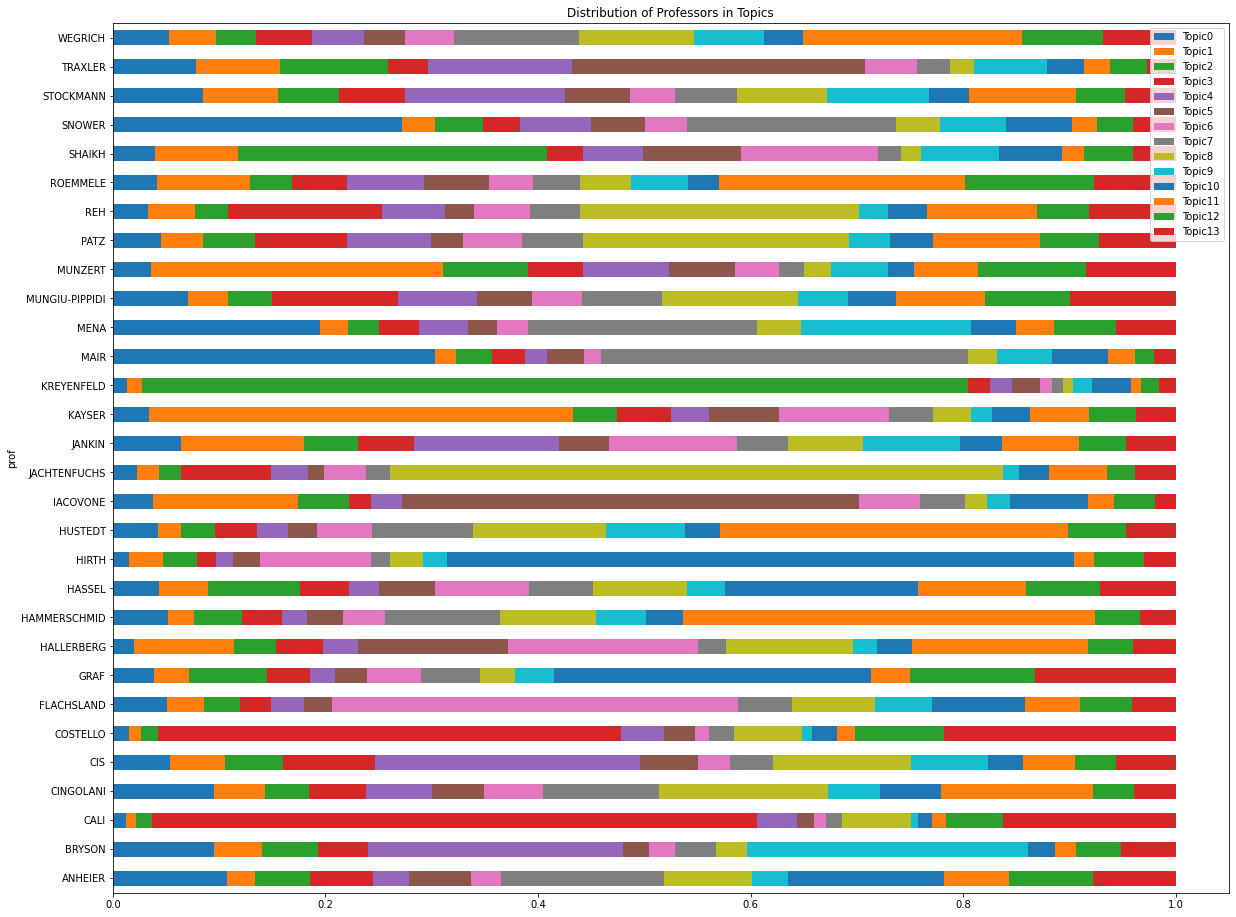

In [15]:
plt.rcParams["figure.figsize"] = [20,16]
bardat2.plot(
    x = 'prof',
    kind = 'barh',
    stacked = True,
    title = 'Distribution of Professors in Topics',
    mark_right = True)

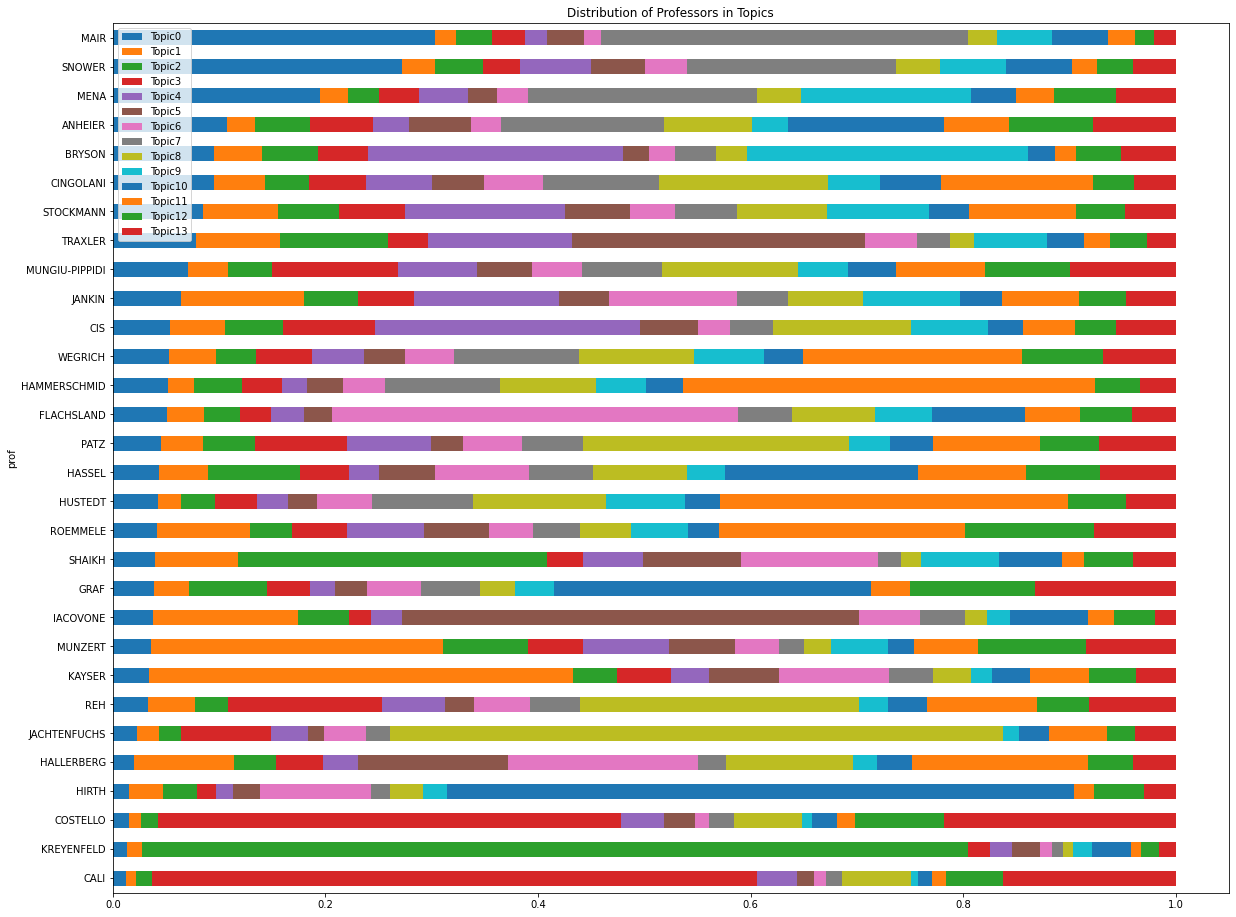

In [16]:
# Sort by topics
bardat2 = bardat2.sort_values('Topic0')
plt.rcParams["figure.figsize"] = [20,16]
bardat2.plot(
    x = 'prof',
    kind = 'barh',
    stacked = True,
    title = 'Distribution of Professors in Topics',
    mark_right = True)


## Bar Chart: Word Counts of Topic Keywords

In [17]:
topics_df_long.head(5)

,prof,topic_id,topic_words,topic,topic_prop
0,Hammerschmid1.txt,11,"['political', 'public', 'government', 'parties...",Topic0,0.009234
1,Hammerschmid2.txt,7,"['organizations', 'business', 'social', 'entre...",Topic0,0.102841
2,Hammerschmid3.txt,12,"['ngiven', 'always', 'extend', 'codes', 'const...",Topic0,0.009742
3,Hammerschmid4.txt,11,"['political', 'public', 'government', 'parties...",Topic0,0.025711
4,Hammerschmid5.txt,11,"['political', 'public', 'government', 'parties...",Topic0,0.039954


In [18]:
bardat = topics_df_long.iloc[:, 1:3]
bardat.head(5)

,topic_id,topic_words
0,11,"['political', 'public', 'government', 'parties..."
1,7,"['organizations', 'business', 'social', 'entre..."
2,12,"['ngiven', 'always', 'extend', 'codes', 'const..."
3,11,"['political', 'public', 'government', 'parties..."
4,11,"['political', 'public', 'government', 'parties..."


In [19]:
# remove leading white space's & split by delimiter
bardat['topic_words'] = bardat['topic_words'].str.strip()\
    .str.replace(",\s+", ",")\
    .str.split(',')

# apply group by to get count of each word.
bardat2  = bardat.explode(column='topic_words').groupby(["topic_id","topic_words"]).size().reset_index(name='count')

In [20]:
bardat3 = bardat.groupby(['topic_id']).count().reset_index().rename(columns={"topic_words": "count"})
bardat3.head(5)

,topic_id,count
0,0,616
1,1,588
2,2,714
3,3,756
4,4,1134


In [21]:
bardat3

,topic_id,count
0,0,616
1,1,588
2,2,714
3,3,756
4,4,1134
5,5,826
6,6,784
7,7,1078
8,8,1134
9,9,630


In [22]:
''.join([bardat3['topic_id'].to_string(), str1])

NameError: ignored

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text major ticklabel objects>)

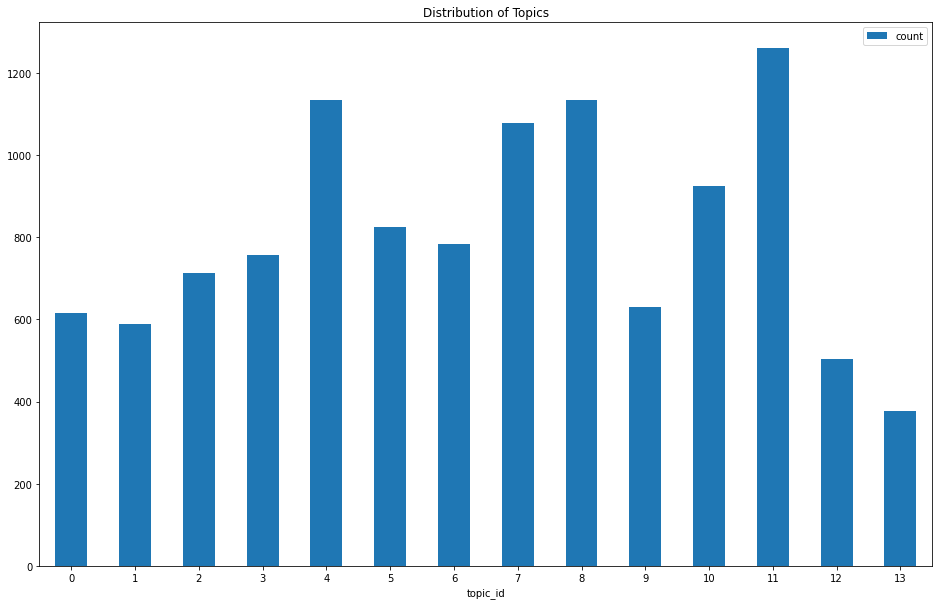

In [23]:
# Plot
plt.rcParams["figure.figsize"] = [16,10]
bardat3.plot(
    x = 'topic_id',
    kind = "bar",
    stacked = False,
    title = 'Distribution of Topics',
    mark_right = True)
plt.xticks(rotation=0)

Visualize Loss

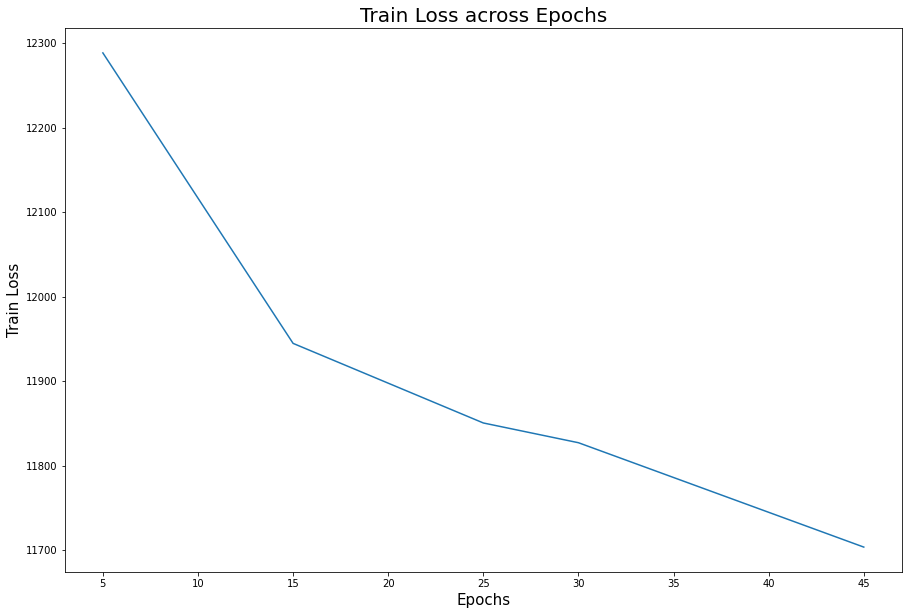

In [3]:
epochs = [5, 15, 25, 30, 45]

loss = [12288.245, 11944.792, 11850.689, 11827.34, 11703.930]

x_unit_length = 5
y_unit_length = 5000

#for e, l in itertools.zip_longest(epochs, loss):
plt.rcParams["figure.figsize"] = [15, 10]
plt.title("Train Loss across Epochs", fontsize=20)
plt.xlabel("Epochs", fontsize=15)
plt.ylabel("Train Loss", fontsize=15)
plt.plot(epochs, loss)
plt.show()
